In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
#from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
#import plotly.express as px
from collections import Counter
%matplotlib inline
import pandas_profiling

C:\Users\ADITYA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data=pd.read_csv("SVM_new.csv")

In [3]:
data.head()

,Unnamed: 0,text,Ans
0,0,last session day httptwitpiccomezh,neutral
1,1,shanghai also really exciting precisely skysc...,neutral
2,2,recession hit veronique branquinho quit compan...,neutral
3,3,happy bday,neutral
4,4,httptwitpiccomwp like it,neutral


In [4]:
data.dropna
data.describe()

,Unnamed: 0
count,3534.000000
mean,1766.500000
std,1020.322253
min,0.000000
25%,883.250000
50%,1766.500000
75%,2649.750000
max,3533.000000


In [5]:
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['text'].head()

0                   last session day httptwitpiccomezh
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                           happy bday
4                             httptwitpiccomwp like it
Name: text, dtype: object

In [6]:
data['text'] = data['text'].apply(lambda x : ' '.join([word for word in str(x).split() if not word in set(stopwords.words('english'))]))

In [7]:
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in str(x).split()]))

In [8]:
from textblob import TextBlob
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                   last session day httptwitpiccomezh
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                            happy day
4                                httptwitpiccomwp like
Name: text, dtype: object

In [9]:
# remove !, ,, . , numbers 
def clean_tweets(tweet):
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    return tweet
data['text'] = data['text'].apply(clean_tweets)

In [10]:
def tokenize(text):
    return word_tokenize(text)
data['tokenized'] = data['text'].apply(tokenize)
data.head()

,Unnamed: 0,text,Ans,tokenized
0,0,last session day httptwitpiccomezh,neutral,"[last, session, day, httptwitpiccomezh]"
1,1,shanghai also really exciting precisely skyscr...,neutral,"[shanghai, also, really, exciting, precisely, ..."
2,2,recession hit veronique branquinho quit compan...,neutral,"[recession, hit, veronique, branquinho, quit, ..."
3,3,happy bday,neutral,"[happy, bday]"
4,4,httptwitpiccomwp like,neutral,"[httptwitpiccomwp, like]"


In [11]:

# 10 most common words
words = Counter()
for idx in data.index:
    words.update(data.loc[idx, "tokenized"])
words.most_common(10)

[('im', 394),
 ('day', 269),
 ('good', 207),
 ('get', 171),
 ('like', 168),
 ('got', 168),
 ('love', 165),
 ('go', 161),
 ('dont', 149),
 ('u', 139)]

Normal words


(-0.5, 799.5, 499.5, -0.5)

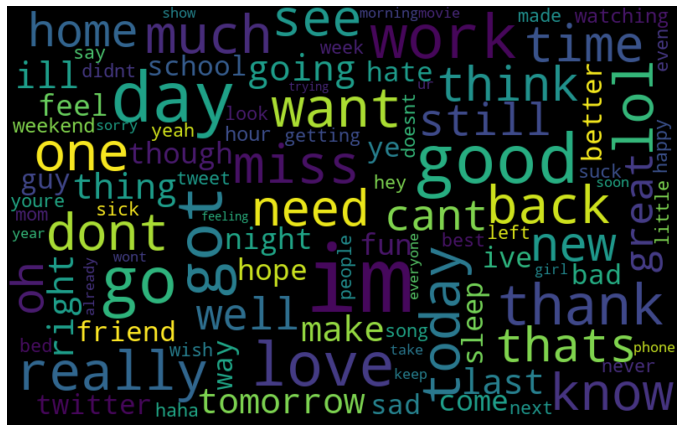

In [12]:
from wordcloud import WordCloud
normal_words = ' '.join([word for word in data['text'][data['Ans'] == 'neutral']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
cv = TfidfVectorizer(max_features=5000) 
x = cv.fit_transform(data['text'].tolist()).toarray()
#y=pd.get_dummies(df['sentiment'])
#y=y.iloc[:,1].values
#x_train, x_test, y_train, y_test = train_test_split(x, data['sentiment'], test_size = 0.20, random_state = 123)

In [14]:
data.Ans[data.Ans == 'positive'] = 1
data.Ans[data.Ans == 'neutral'] = 0
data.Ans[data.Ans == 'negative'] = 2
y=data['Ans'].astype('float')
print(y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3529    0.0
3530    2.0
3531    0.0
3532    0.0
3533    0.0
Name: Ans, Length: 3534, dtype: float64


In [15]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) #Basic train_test_split works here
y_test.shape

(884,)

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [18]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred=svc.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[661   0   9]
 [ 72   5   2]
 [104   0  31]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       670
         1.0       1.00      0.06      0.12        79
         2.0       0.74      0.23      0.35       135

    accuracy                           0.79       884
   macro avg       0.84      0.43      0.45       884
weighted avg       0.80      0.79      0.73       884



In [17]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [18]:
y_pred=clf.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       738
         1.0       0.00      0.00      0.00        46
         2.0       0.75      0.09      0.16       100

    accuracy                           0.84       884
   macro avg       0.53      0.36      0.36       884
weighted avg       0.79      0.84      0.78       884



In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

In [26]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data['text'], data['sentiment'], train_size = 0.75, random_state=0, shuffle = True, stratify=data['sentiment'])

In [27]:

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X1_train)
X_train_counts.shape

(20586, 22425)

In [28]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(20586, 22425)

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(x_train,y_train);

In [19]:
y_pred=rf.predict(x_test)
#errors = abs(y_pred - y_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83       557
         1.0       0.67      0.30      0.42       126
         2.0       0.69      0.44      0.54       201

    accuracy                           0.73       884
   macro avg       0.70      0.56      0.59       884
weighted avg       0.72      0.73      0.70       884



In [56]:
valid=pd.read_csv("validation.csv")

In [57]:
valid.dropna
valid.describe()

,text
count,3534
unique,3530
top,#NAME?
freq,5


In [58]:
valid['text'] = valid['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
valid['text'].head()

0     last session of the day http://twitpic.com/67ezh
1    shanghai is also really exciting (precisely --...
2    recession hit veronique branquinho, she has to...
3                                          happy bday!
4               http://twitpic.com/4w75p - i like it!!
Name: text, dtype: object

In [59]:
valid['text'] = valid['text'].apply(lambda x : ' '.join([word for word in str(x).split() if not word in set(stopwords.words('english'))]))

In [60]:
lemmatizer = WordNetLemmatizer()
valid['text'] = valid['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in str(x).split()]))

In [61]:
from textblob import TextBlob
valid['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0            last session day http://twitpic.com/67ezh
1    shanghai also really exciting (precisely -- sk...
2    recession hit veronique branquinho, quit compa...
3                                           happy day!
4                 http://twitpic.com/4w75p - like it!!
Name: text, dtype: object

In [62]:
def clean_tweets(tweet):
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    return tweet
valid['text'] = valid['text'].apply(clean_tweets)

In [63]:
def tokenize(text):
    return word_tokenize(text)
valid['tokenized'] = valid['text'].apply(tokenize)
valid.head()

,text,tokenized
0,last session day httptwitpiccomezh,"[last, session, day, httptwitpiccomezh]"
1,shanghai also really exciting precisely skysc...,"[shanghai, also, really, exciting, precisely, ..."
2,recession hit veronique branquinho quit compan...,"[recession, hit, veronique, branquinho, quit, ..."
3,happy bday,"[happy, bday]"
4,httptwitpiccomwp like it,"[httptwitpiccomwp, like, it]"


In [64]:
# 10 most common words
words = Counter()
for idx in valid.index:
    words.update(valid.loc[idx, "tokenized"])
words.most_common(10)

[('im', 394),
 ('day', 257),
 ('good', 207),
 ('get', 171),
 ('its', 171),
 ('like', 168),
 ('got', 168),
 ('love', 165),
 ('go', 161),
 ('dont', 149)]

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
cv = TfidfVectorizer(max_features=5000) 
x_valid = cv.fit_transform(valid['text'].tolist()).toarray()
#y=pd.get_dummies(df['sentiment'])
#y=y.iloc[:,1].values
#x_train, x_test, y_train, y_test = train_test_split(x, data['sentiment'], test_size = 0.20, random_state = 123)

In [66]:
y_pred=rf.predict(x_valid)

In [67]:
y_pred.shape

(3534,)

In [68]:
y_pred

array([0., 2., 2., ..., 0., 0., 0.])

In [69]:
valid['Ans']=pd.Series(y_pred)
del valid['tokenized']

In [70]:
valid.head()

,text,Ans
0,last session day httptwitpiccomezh,0.0
1,shanghai also really exciting precisely skysc...,2.0
2,recession hit veronique branquinho quit compan...,2.0
3,happy bday,0.0
4,httptwitpiccomwp like it,0.0


In [71]:
valid.Ans[valid.Ans == 1.0] = 'positive'
valid.Ans[valid.Ans == 0.0] = 'neutral'
valid.Ans[valid.Ans == 2.0] = 'negative'
valid['Ans']
valid.to_csv('Random_Forest.csv')

In [6]:
data=pd.read_csv("Random_Forest.csv")
check=pd.read_csv("results.csv")

In [7]:
from sklearn.metrics import classification_report
print(classification_report(data['Ans'],check['sentiment']))

              precision    recall  f1-score   support

    negative       0.25      0.31      0.27       813
     neutral       0.66      0.42      0.51      2254
    positive       0.17      0.40      0.24       467

    accuracy                           0.39      3534
   macro avg       0.36      0.37      0.34      3534
weighted avg       0.50      0.39      0.42      3534

